<a href="https://colab.research.google.com/github/sharmadharmpal/ColabRepo/blob/main/BostonHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np  
from sklearn.linear_model import Ridge,LinearRegression, Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [ ]:
#Configure plots
plt.rcParams['figure.dpi']=200
plt.rcParams['savefig.bbox']='tight'

In [ ]:
#Load data
rawdataBoston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
rawdataBoston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
X,y=rawdataBoston.data,rawdataBoston.target

In [ ]:
X.shape

(506, 13)

In [ ]:
y[0:13]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7])

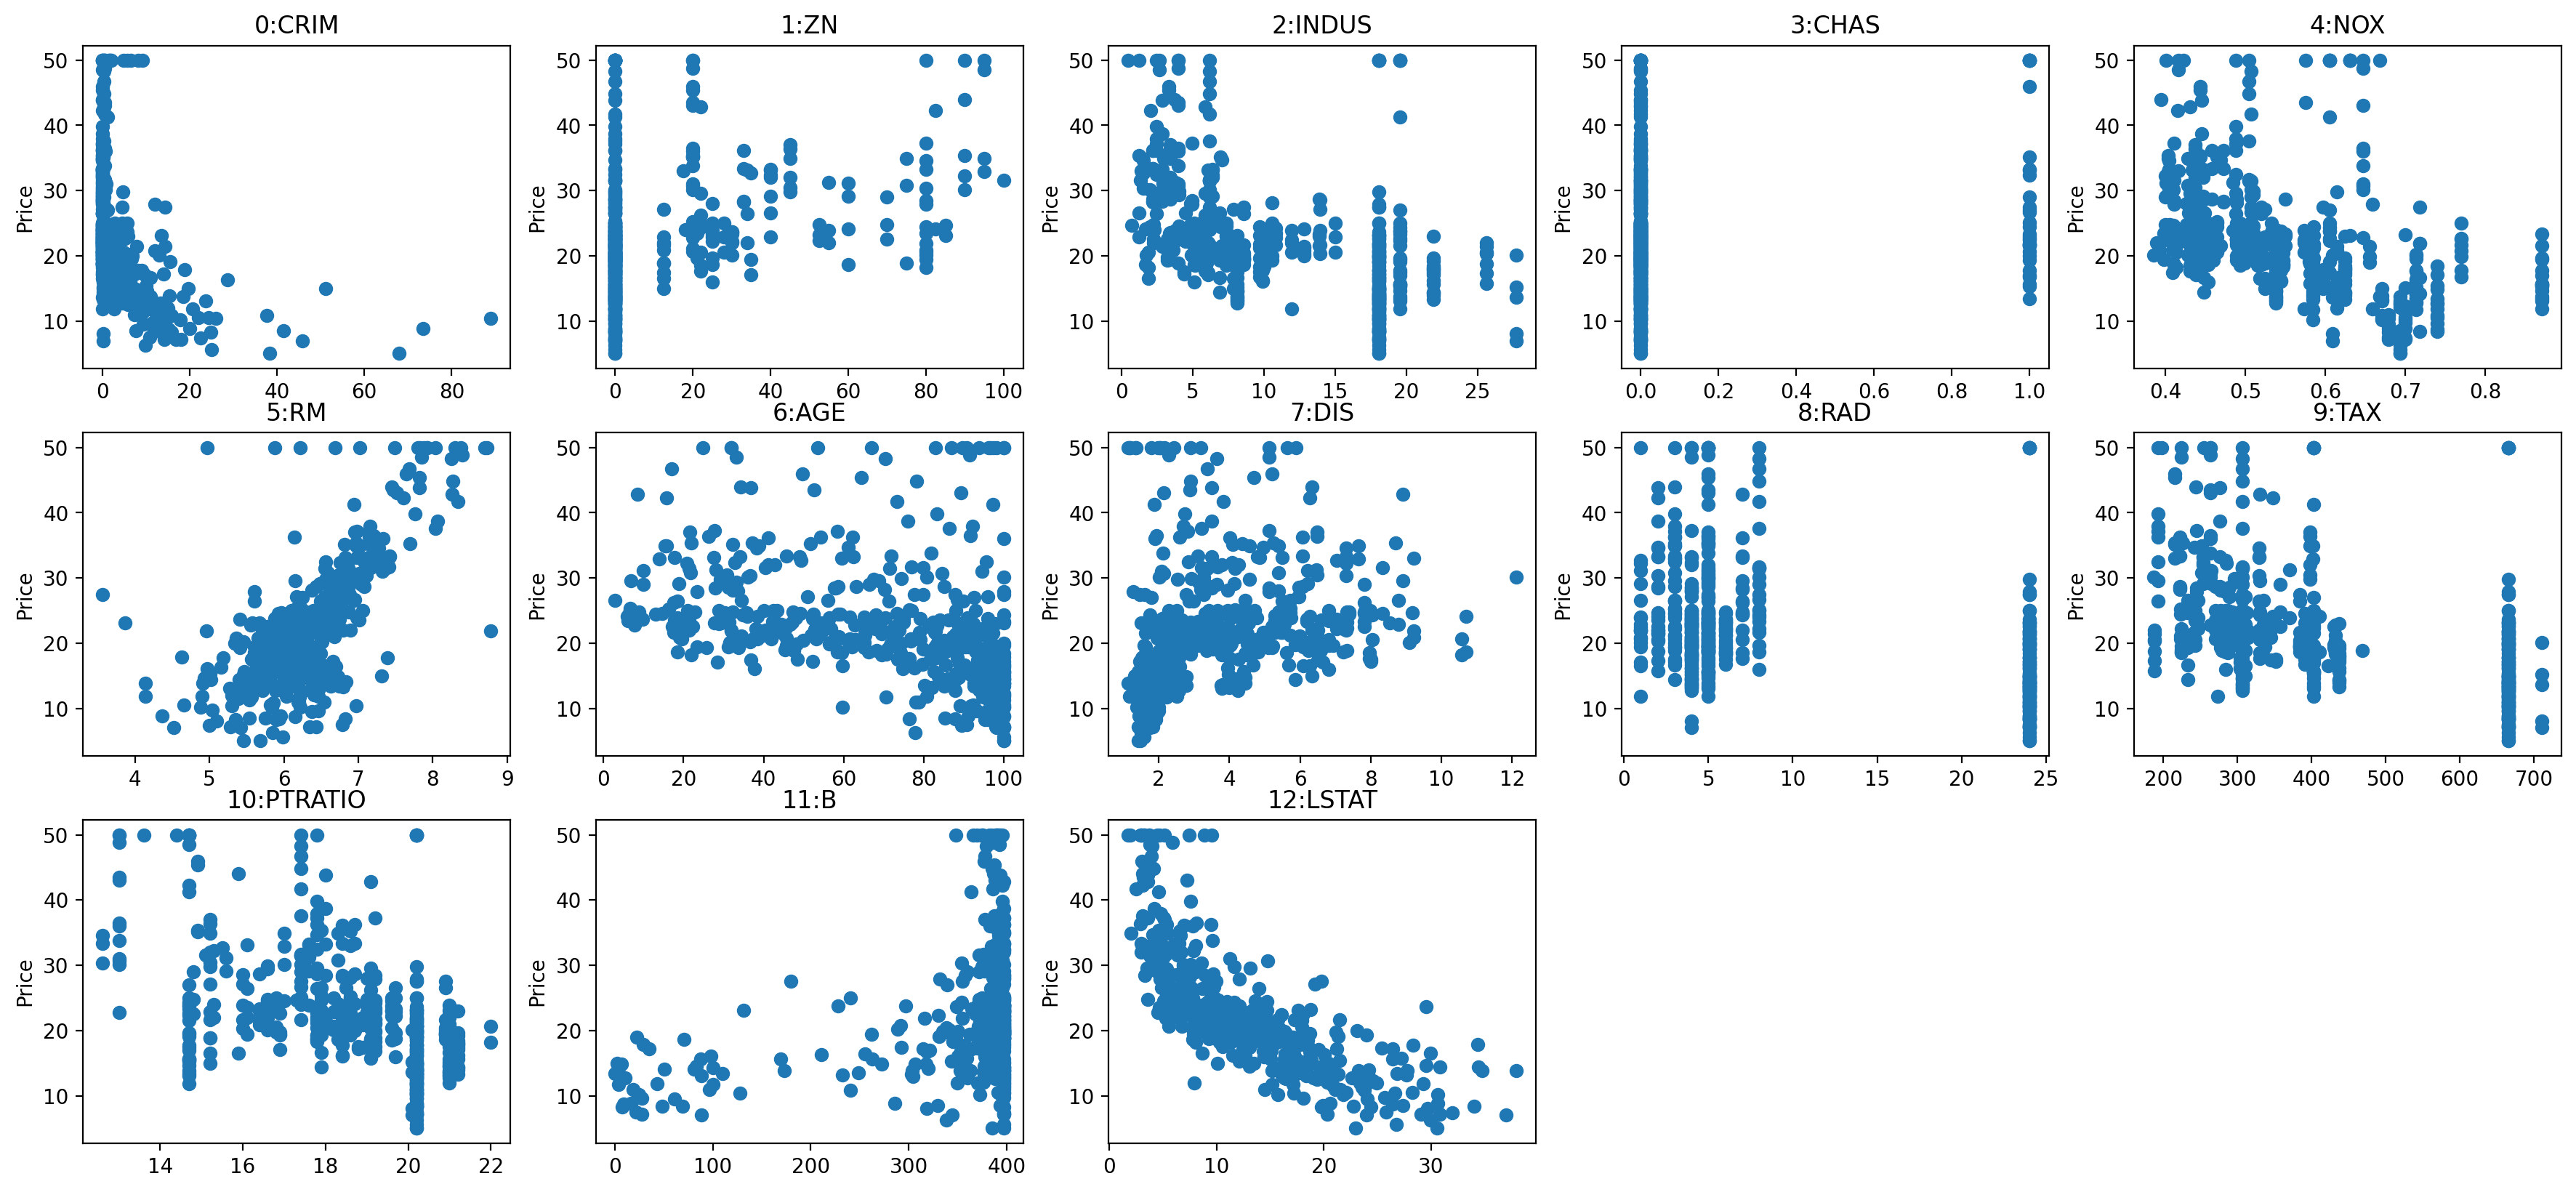

In [ ]:
fig, axes = plt.subplots(3, 5,figsize=(22,10))
axes=axes.ravel()
#axs[0, 0].plot(x, y)
#axs[0, 0].set_title('Axis [0, 0]')
#axs[0, 0].plot([4,5,6,7], [44,5,6,7], 'tab:orange')
for i, ax in enumerate(axes):
  if (i>12):
    ax.set_visible(False)
    continue
  ax.plot(X[:,i],y,'o')
  ax.set_title("{}:{}".format(i,rawdataBoston.feature_names[i]))
  ax.set_ylabel("Price")






In [ ]:
#fig, axs = plt.subplots(2, 2,figsize=(8,3))

In [ ]:
from sklearn.model_selection import train_test_split


#Divide data for training, Test and validation

In [ ]:
X_train, X_test,y_train,y_test= train_test_split(X,y,train_size=.6, random_state=42)

# Test data is further divided into half for validation and testing

In [ ]:
X_val, X_test,y_val,y_test= train_test_split(X_test,y_test, test_size=.5, random_state=25)

In [ ]:
X_train.shape,X_test.shape,X_val.shape

((303, 13), (102, 13), (101, 13))

# Training the model (One way)

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([-1.13498178e-01,  3.79976868e-02,  2.99876109e-02,  3.51131977e+00,
       -1.44513558e+01,  3.80534175e+00, -1.79553906e-02, -1.48968845e+00,
        2.53016064e-01, -1.00262729e-02, -8.86408743e-01,  1.08462004e-02,
       -5.75917903e-01])

In [ ]:
train_score = lr.score(X_train,y_train)

In [ ]:
print("Score for Traindataset {:.2f}".format(train_score))

Score for Traindataset 0.75


# Second way

In [ ]:
cross_scores_lr = cross_val_score(lr,X_train,y_train,cv=10)

In [ ]:
print(cross_scores_lr)

[0.6467872  0.42972784 0.76276391 0.71445764 0.79979583 0.83656163
 0.58911967 0.69606769 0.75087122 0.55173139]


In [ ]:
print(np.mean(cross_scores_lr))
print(np.std(cross_scores_lr))

0.6777884009891801
0.11856773690971528


In [ ]:
rr=Ridge()
cross_scores_rr = cross_val_score(rr,X_train,y_train,cv=10)
print(cross_scores_rr)
print(np.mean(cross_scores_rr))
print(np.std(cross_scores_rr))

[0.64782563 0.43378937 0.76968258 0.70403003 0.80092641 0.8388229
 0.59415613 0.68472456 0.74474269 0.54113972]
0.675984002610007
0.11867062934347794
